In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# **Data Preprocessing**

In [2]:
movies_df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1')
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


## **Handling Duplicates**

In [4]:
movies_df.duplicated().sum()

6

In [5]:
rest_df, test_df = [x for y, x in movies_df.groupby(movies_df['Rating'].isna())]

In [6]:
test_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
14,101 Ratein,(1990),NaN,Thriller,NaN,NaN,Harish,Saraswati,Disco Shanti,NaN


In [7]:
rest_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [8]:
train_df, validation_df = train_test_split(rest_df, train_size = 0.75, random_state = 101)
train_df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
11500,Rahi,(1953),139 min,Drama,7.0,28,Khwaja Ahmad Abbas,Dev Anand,Nalini Jaywant,Balraj Sahni
5167,Gooli,(2008),138 min,"Action, Drama, Romance",6.4,80,P. Satya,Sudeep,Mamta Mohandas,Kishore Kumar G.
4825,Galiyon Ka Badshah,(1989),NaN,"Drama, Action, Crime",4.9,29,Sher Jung Singh,K. Yogi,Raaj Kumar,Hema Malini
3597,Delhi in a Day,(2011),88 min,"Comedy, Drama",6.2,395,Prashant Nair,Victor Banerjee,Siddharth Bhardwaj,Vidya Bhushan
15080,WOH,(2004),NaN,"Crime, Drama, Thriller",4.4,40,Raj N. Sippy,Priyanshu Chatterjee,Sumeet Goradia,Cleo Isaacs


In [9]:
validation_df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12679,Seeking Happily Ever After,(2018),104 min,"Drama, Romance",6.8,"1,117",Harish Vyas,Shivani Raghuvanshi,Anshuman Jha,Ekavali Khanna
12294,Samar,(1998),126 min,Drama,7.5,31,Shyam Benegal,Rajeshwari Sachdev,Rajit Kapoor,Ravi Jhankal
6739,Jigariyaa,(2014),142 min,Drama,4.9,301,Raj Purohit,Harshvardhan Deo,Cherry Mardia,Deepak Chaddha
348,Aakhri Insaaf,(1980),NaN,"Action, Mystery",4.9,10,Kalidas,Mithun Chakraborty,Vijayendra Ghatge,Ashok Kumar
5439,Hamari Baat,(1943),NaN,NaN,8.2,9,M.I. Dharamsey,Devika Rani,Suraiya,David Abraham


In [10]:
print(train_df.duplicated().sum())
print(validation_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0
6


In [11]:
test_df.drop_duplicates(inplace = True)
test_df.duplicated().sum()

0

## **Handling missing values**

In [12]:
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    result_movie = pd.DataFrame({'Missing Values': missing_values})
    return result_movie

print("\ntrain_df : ",missing_values_percent(train_df))
print("\nvalidation df : ",missing_values_percent(validation_df))
print("\ntest df : ",missing_values_percent(test_df))


train_df :            Missing Values
Name                   0
Year                   0
Duration            1546
Genre                 79
Rating                 0
Votes                  0
Director               4
Actor 1              102
Actor 2              156
Actor 3              226

validation df :            Missing Values
Name                   0
Year                   0
Duration             522
Genre                 23
Rating                 0
Votes                  0
Director               1
Actor 1               23
Actor 2               44
Actor 3               66

test df :            Missing Values
Name                   0
Year                 527
Duration            6196
Genre               1774
Rating              7584
Votes               7583
Director             519
Actor 1             1490
Actor 2             2181
Actor 3             2848


**Year**





In [13]:
mode_year = train_df['Year'].mode()
test_df['Year'] = test_df['Year'].fillna(2019)
test_df['Year'].info()

<class 'pandas.core.series.Series'>
Index: 7584 entries, 0 to 15507
Series name: Year
Non-Null Count  Dtype 
--------------  ----- 
7584 non-null   object
dtypes: object(1)
memory usage: 118.5+ KB


**Duration**

In [14]:
train_df['Duration'] = train_df['Duration'].str.extract('([0-9]+)').astype(float)
validation_df['Duration'] = validation_df['Duration'].str.extract('([0-9]+)').astype(float)
test_df['Duration'] = test_df['Duration'].str.extract('([0-9]+)').astype(float)

In [15]:
print(train_df['Duration'].dtype)
print(validation_df['Duration'].dtype)
print(test_df['Duration'].dtype)

float64
float64
float64


In [16]:
median_duration = train_df['Duration'].median()

train_df['Duration'] = train_df['Duration'].fillna(median_duration)
validation_df['Duration'] = validation_df['Duration'].fillna(median_duration)
test_df['Duration'] = test_df['Duration'].fillna(median_duration)

train_df['Duration'].info()

<class 'pandas.core.series.Series'>
Index: 5939 entries, 11500 to 9574
Series name: Duration
Non-Null Count  Dtype  
--------------  -----  
5939 non-null   float64
dtypes: float64(1)
memory usage: 92.8 KB


**Genre**

In [17]:
def expand_genre(df):
    genres_df = df['Genre'].str.split(', ', expand = True)
    df = pd.concat([df, genres_df], axis = 1)
    df.rename(columns = {0 : 'Genre_1', 1 : 'Genre_2', 2 : 'Genre_3'}, inplace = True)
    df.drop('Genre', axis = 1, inplace = True)
    return df

train_df = expand_genre(train_df)
validation_df = expand_genre(validation_df)
test_df = expand_genre(test_df)

In [18]:

def missing_genres(df):
  genre_cols = ['Genre_1', 'Genre_2', 'Genre_3']
  missing_genres = {}
  for col in genre_cols:
    missing_genres[col] = df[col].isnull().sum()
  return missing_genres

train_missing_genres = missing_genres(train_df)
validation_missing_genres = missing_genres(validation_df)
test_missing_genres = missing_genres(test_df)

print("Missing genres in train_df:")
for genre, missing_count in train_missing_genres.items():
  print(f"\t{genre}: {missing_count}")

print("\nMissing genres in validation_df:")
for genre, missing_count in validation_missing_genres.items():
  print(f"\t{genre}: {missing_count}")

print("\nMissing genres in test_df:")
for genre, missing_count in test_missing_genres.items():
  print(f"\t{genre}: {missing_count}")


Missing genres in train_df:
	Genre_1: 79
	Genre_2: 2135
	Genre_3: 3840

Missing genres in validation_df:
	Genre_1: 23
	Genre_2: 678
	Genre_3: 1267

Missing genres in test_df:
	Genre_1: 1774
	Genre_2: 6489
	Genre_3: 7156


In [19]:
def drop_genre(df):
    df.drop(['Genre_2','Genre_3'], axis = 1, inplace = True)
    df.rename(columns = {'Genre_1' : 'Genre'}, inplace = True)
    return df

train_df = drop_genre(train_df)
validation_df = drop_genre(validation_df)
test_df = drop_genre(test_df)

In [20]:
mode_per_year = train_df.groupby('Year')['Genre'].apply(lambda x: x.mode().iloc[0])    # Gives a df with node of each year
train_df['Genre'] = train_df.apply(lambda row: mode_per_year[row['Year']] if pd.isnull(row['Genre']) else row['Genre'], axis=1)
validation_df['Genre'] = validation_df.apply(lambda row: mode_per_year[row['Year']] if pd.isnull(row['Genre']) else row['Genre'], axis=1)


In [21]:
genre_mode = train_df['Genre'].mode()
genre_mode

0    Drama
Name: Genre, dtype: object

In [22]:
#filling with genre_mode for test_df
test_df['Genre'] = test_df['Genre'].fillna(genre_mode[0])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7584 entries, 0 to 15507
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7584 non-null   object 
 1   Year      7584 non-null   object 
 2   Duration  7584 non-null   float64
 3   Rating    0 non-null      float64
 4   Votes     1 non-null      object 
 5   Director  7065 non-null   object 
 6   Actor 1   6094 non-null   object 
 7   Actor 2   5403 non-null   object 
 8   Actor 3   4736 non-null   object 
 9   Genre     7584 non-null   object 
dtypes: float64(2), object(8)
memory usage: 651.8+ KB


**Votes**

In [23]:
set(test_df['Votes'].tolist())

{'$5.16M', nan}

In [24]:
test_df['Votes'] = test_df['Votes'].replace('$5.16M', np.nan)


**Director/Actor1/Actor2/Actor3**

In [25]:
def fill_names(df):
    df['Director'] = df['Director'].fillna('Not Available')
    df['Actor 1'] = df['Actor 1'].fillna('Not Available')
    df['Actor 2'] = df['Actor 2'].fillna('Not Available')
    df['Actor 3'] = df['Actor 3'].fillna('Not Available')
    return df

train_df = fill_names(train_df)
validation_df = fill_names(validation_df)
test_df = fill_names(test_df)

In [26]:
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    result_movie = pd.DataFrame({'Missing Values': missing_values})
    return result_movie

print("\ntrain_df : ",missing_values_percent(train_df))
print("\nvalidation df : ",missing_values_percent(validation_df))
print("\ntest df : ",missing_values_percent(test_df))


train_df :            Missing Values
Name                   0
Year                   0
Duration               0
Rating                 0
Votes                  0
Director               0
Actor 1                0
Actor 2                0
Actor 3                0
Genre                  0

validation df :            Missing Values
Name                   0
Year                   0
Duration               0
Rating                 0
Votes                  0
Director               0
Actor 1                0
Actor 2                0
Actor 3                0
Genre                  0

test df :            Missing Values
Name                   0
Year                   0
Duration               0
Rating              7584
Votes               7584
Director               0
Actor 1                0
Actor 2                0
Actor 3                0
Genre                  0


## **Encoding**

In [27]:
obj_list = train_df.select_dtypes(include = ['object']).columns.tolist()
print(obj_list)
for i in obj_list:
    print("Percentage of unique values in training dataset for %s column is: %s percent" % (i, train_df[i].nunique() / len(train_df) * 100))

['Name', 'Year', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre']
Percentage of unique values in training dataset for Name column is: 94.49402256272099 percent
Percentage of unique values in training dataset for Year column is: 1.5490823370937867 percent
Percentage of unique values in training dataset for Votes column is: 27.664589998316213 percent
Percentage of unique values in training dataset for Director column is: 44.182522310153225 percent
Percentage of unique values in training dataset for Actor 1 column is: 35.4268395352753 percent
Percentage of unique values in training dataset for Actor 2 column is: 40.175113655497555 percent
Percentage of unique values in training dataset for Actor 3 column is: 43.222764775214685 percent
Percentage of unique values in training dataset for Genre column is: 0.3367570298029971 percent


In [28]:
train_df.drop('Name', axis=1, inplace=True)
validation_df.drop('Name', axis=1, inplace=True)


In [29]:
!pip install category_encoders

In [30]:
import category_encoders as ce
categorical_variables = train_df.select_dtypes(include = ['object']).columns.tolist()
encoder = ce.TargetEncoder(cols = categorical_variables)
encoded_df = encoder.fit_transform(train_df[categorical_variables], train_df['Rating'])
encoded_df.columns = [f"{col}_TargetEncoded" for col in categorical_variables]
train_df = pd.concat([train_df, encoded_df], axis = 1)
train_df.head(5)


,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre,Year_TargetEncoded,Votes_TargetEncoded,Director_TargetEncoded,Actor 1_TargetEncoded,Actor 2_TargetEncoded,Actor 3_TargetEncoded,Genre_TargetEncoded
11500,(1953),139.0,7.0,28,Khwaja Ahmad Abbas,Dev Anand,Nalini Jaywant,Balraj Sahni,Drama,6.316465,5.980524,5.998386,6.831455,5.865679,6.167203,6.185942
5167,(2008),138.0,6.4,80,P. Satya,Sudeep,Mamta Mohandas,Kishore Kumar G.,Action,5.260488,6.023343,5.929491,5.877261,5.872009,5.929491,5.437335
4825,(1989),134.0,4.9,29,Sher Jung Singh,K. Yogi,Raaj Kumar,Hema Malini,Drama,5.293448,6.069595,5.850732,5.734328,6.035590,5.911561,6.185942
3597,(2011),88.0,6.2,395,Prashant Nair,Victor Banerjee,Siddharth Bhardwaj,Vidya Bhushan,Comedy,5.500877,5.668607,6.035138,5.989191,5.903469,5.903469,5.857559
15080,(2004),134.0,4.4,40,Raj N. Sippy,Priyanshu Chatterjee,Sumeet Goradia,Cleo Isaacs,Crime,5.274162,5.789124,5.554315,5.916825,5.669274,5.669274,6.041985


In [31]:
train_df = train_df.drop(['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], axis = 1)
train_df.head(5)

,Year,Duration,Rating,Votes,Year_TargetEncoded,Votes_TargetEncoded,Director_TargetEncoded,Actor 1_TargetEncoded,Actor 2_TargetEncoded,Actor 3_TargetEncoded,Genre_TargetEncoded
11500,(1953),139.0,7.0,28,6.316465,5.980524,5.998386,6.831455,5.865679,6.167203,6.185942
5167,(2008),138.0,6.4,80,5.260488,6.023343,5.929491,5.877261,5.872009,5.929491,5.437335
4825,(1989),134.0,4.9,29,5.293448,6.069595,5.850732,5.734328,6.035590,5.911561,6.185942
3597,(2011),88.0,6.2,395,5.500877,5.668607,6.035138,5.989191,5.903469,5.903469,5.857559
15080,(2004),134.0,4.4,40,5.274162,5.789124,5.554315,5.916825,5.669274,5.669274,6.041985


In [32]:
encoded_val_df = encoder.fit_transform(validation_df[categorical_variables], validation_df['Rating'])
encoded_val_df.columns = [f"{col}_TargetEncoded" for col in categorical_variables]
validation_df = pd.concat([validation_df, encoded_val_df], axis = 1)
validation_df = validation_df.drop(['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], axis = 1)
validation_df.head(5)

,Year,Duration,Rating,Votes,Year_TargetEncoded,Votes_TargetEncoded,Director_TargetEncoded,Actor 1_TargetEncoded,Actor 2_TargetEncoded,Actor 3_TargetEncoded,Genre_TargetEncoded
12679,(2018),104.0,6.8,"1,117",6.087358,5.920663,5.920663,5.920663,5.953810,5.920663,6.134947
12294,(1998),126.0,7.5,31,5.170806,5.929156,6.067291,6.011739,6.011739,6.011739,6.134947
6739,(2014),142.0,4.9,301,5.448142,5.673457,5.673457,5.673457,5.673457,5.673457,6.134947
348,(1980),134.0,4.9,10,5.781525,5.690808,5.706975,5.271714,5.673457,5.929144,5.391610
5439,(1943),134.0,8.2,9,6.058558,5.678156,6.102815,6.102815,6.063762,6.116939,6.134947


In [33]:
train_df.shape

(5939, 11)

In [34]:
validation_df.shape

(1980, 11)

# **Model Building**

In [35]:
train_df['Year'] = train_df['Year'].str.replace('(', '').str.replace(')', '')
validation_df['Year'] = validation_df['Year'].str.replace('(', '').str.replace(')', '')
test_df['Year'] = test_df['Year'].str.replace('(', '').str.replace(')', '')

In [36]:
train_df['Votes'] = train_df['Votes'].str.replace(',', '').astype(int)
train_df['Year'] = train_df['Year'].astype(int)
validation_df['Votes'] = validation_df['Votes'].str.replace(',', '').astype(int)
validation_df['Year'] = validation_df['Year'].astype(int)


In [37]:

raw_x_train = train_df.drop(['Rating'], axis = 1)
raw_y_train = train_df['Rating']

raw_x_val = validation_df.drop(['Rating'], axis = 1)
raw_y_val = validation_df['Rating']

raw_x_train.head(5)

,Year,Duration,Votes,Year_TargetEncoded,Votes_TargetEncoded,Director_TargetEncoded,Actor 1_TargetEncoded,Actor 2_TargetEncoded,Actor 3_TargetEncoded,Genre_TargetEncoded
11500,1953,139.0,28,6.316465,5.980524,5.998386,6.831455,5.865679,6.167203,6.185942
5167,2008,138.0,80,5.260488,6.023343,5.929491,5.877261,5.872009,5.929491,5.437335
4825,1989,134.0,29,5.293448,6.069595,5.850732,5.734328,6.035590,5.911561,6.185942
3597,2011,88.0,395,5.500877,5.668607,6.035138,5.989191,5.903469,5.903469,5.857559
15080,2004,134.0,40,5.274162,5.789124,5.554315,5.916825,5.669274,5.669274,6.041985


In [38]:
raw_x_val.head(5)

,Year,Duration,Votes,Year_TargetEncoded,Votes_TargetEncoded,Director_TargetEncoded,Actor 1_TargetEncoded,Actor 2_TargetEncoded,Actor 3_TargetEncoded,Genre_TargetEncoded
12679,2018,104.0,1117,6.087358,5.920663,5.920663,5.920663,5.953810,5.920663,6.134947
12294,1998,126.0,31,5.170806,5.929156,6.067291,6.011739,6.011739,6.011739,6.134947
6739,2014,142.0,301,5.448142,5.673457,5.673457,5.673457,5.673457,5.673457,6.134947
348,1980,134.0,10,5.781525,5.690808,5.706975,5.271714,5.673457,5.929144,5.391610
5439,1943,134.0,9,6.058558,5.678156,6.102815,6.102815,6.063762,6.116939,6.134947


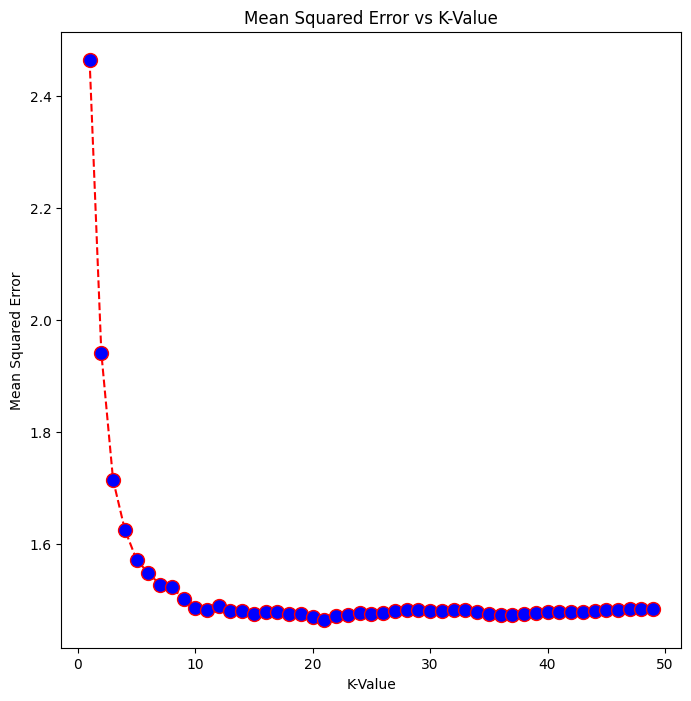

In [39]:
# The best value of K based on mean squared error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

def find_k(x_train, y_train, x_test, y_test):
    error_rate = []

    for i in range(1, 50):
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(mean_squared_error(y_test, y_pred))



    plt.figure(figsize = (8, 8))
    plt.plot(range(1,50), error_rate, color = 'red', linestyle = 'dashed', marker = 'o', markersize = 10, markerfacecolor = 'blue')
    plt.title("Mean Squared Error vs K-Value")
    plt.xlabel("K-Value")
    plt.ylabel("Mean Squared Error")
    plt.show()
find_k(raw_x_train, raw_y_train, raw_x_val, raw_y_val)

Accuracy Scores for Linear Regression model
Mean Squared Error : 0.612604909036937
R-squared Score (Train) : 0.6606214409936702
R-squared Score (Test) : 0.6749267436054448
**************************************************************************************************
Accuracy Scores for Lasso Regression model
Mean Squared Error : 0.7127806326310628
R-squared Score (Train) : 0.604248861495387
R-squared Score (Test) : 0.6217694015730127
**************************************************************************************************
Accuracy Scores for Ridge Regression model
Mean Squared Error : 0.6126102884334319
R-squared Score (Train) : 0.6606214345883268
R-squared Score (Test) : 0.6749238890773301
**************************************************************************************************
Accuracy Scores for Elastic Net Regression model
Mean Squared Error : 0.7299300859597927
R-squared Score (Train) : 0.6063157233459882
R-squared Score (Test) : 0.6126691992130273
**********

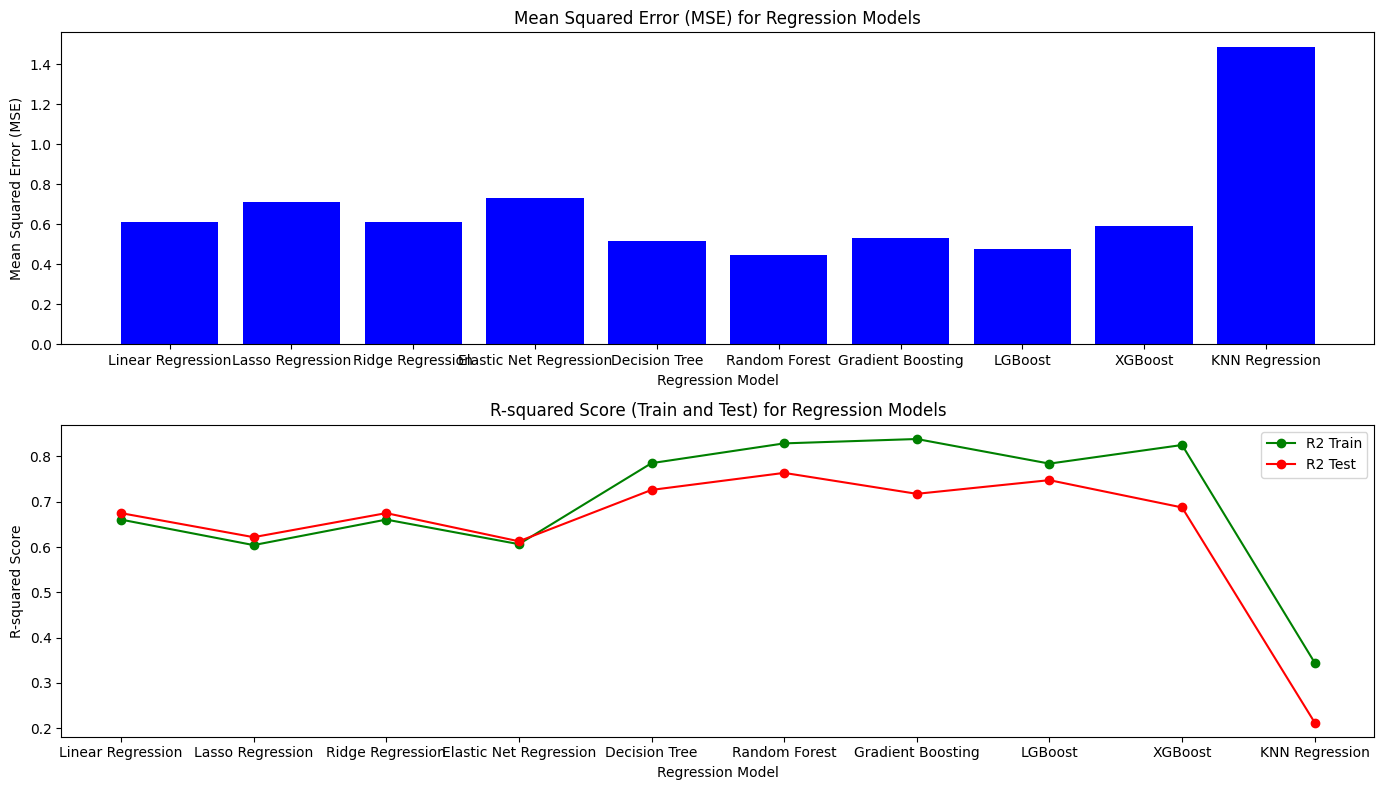

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Function to evaluate regression models and return results
def evaluate_regression_models(x_train, y_train, x_val, y_val):
    models = {
        'Linear Regression': LinearRegression(),
        'Lasso Regression': Lasso(alpha=0.05),
        'Ridge Regression': Ridge(alpha=0.05),
        'Elastic Net Regression': ElasticNet(alpha=0.05, random_state=101),
        'Decision Tree': DecisionTreeRegressor(max_depth=6),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=1, max_depth=6),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=123),
        'LGBoost': lgb.LGBMRegressor(random_state=11, max_depth=3, num_leaves=3, force_col_wise=True),
        'XGBoost': xgb.XGBRegressor(random_state=111, max_depth=2),
        'KNN Regression': KNeighborsRegressor(n_neighbors=10)
    }

    results = {}

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred_train = model.predict(x_train)
        y_pred_val = model.predict(x_val)

        rmse = mean_squared_error(y_val, y_pred_val)
        r2_train = r2_score(y_train, y_pred_train)
        r2_val = r2_score(y_val, y_pred_val)

        results[model_name] = {
            'RMSE': rmse,
            'R2 Score (Train)': r2_train,
            'R2 Score (Test)': r2_val
        }

        print(f"Accuracy Scores for {model_name} model")
        print("Mean Squared Error :", rmse)
        print("R-squared Score (Train) :", r2_train)
        print("R-squared Score (Test) :", r2_val)
        print("**************" * 7)

    return results

# Example usage:
# Assuming raw_x_train, raw_y_train, raw_x_val, raw_y_val are defined appropriately

results = evaluate_regression_models(raw_x_train, raw_y_train, raw_x_val, raw_y_val)

# Plotting results
model_names = list(results.keys())
mse_scores = [results[model]['RMSE'] for model in model_names]
r2_train_scores = [results[model]['R2 Score (Train)'] for model in model_names]
r2_test_scores = [results[model]['R2 Score (Test)'] for model in model_names]

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.bar(model_names, mse_scores, color='blue')
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Regression Models')

plt.subplot(2, 1, 2)
plt.plot(model_names, r2_train_scores, marker='o', linestyle='-', color='green', label='R2 Train')
plt.plot(model_names, r2_test_scores, marker='o', linestyle='-', color='red', label='R2 Test')
plt.xlabel('Regression Model')
plt.ylabel('R-squared Score')
plt.title('R-squared Score (Train and Test) for Regression Models')
plt.legend()

plt.tight_layout()
plt.show()

# Export results to CSV
import pandas as pd

results_df = pd.DataFrame(results)
results_df.to_csv('Regression_models_evaluation_results.csv', index=False)


In [41]:
raw_x_train.head(5)

,Year,Duration,Votes,Year_TargetEncoded,Votes_TargetEncoded,Director_TargetEncoded,Actor 1_TargetEncoded,Actor 2_TargetEncoded,Actor 3_TargetEncoded,Genre_TargetEncoded
11500,1953,139.0,28,6.316465,5.980524,5.998386,6.831455,5.865679,6.167203,6.185942
5167,2008,138.0,80,5.260488,6.023343,5.929491,5.877261,5.872009,5.929491,5.437335
4825,1989,134.0,29,5.293448,6.069595,5.850732,5.734328,6.035590,5.911561,6.185942
3597,2011,88.0,395,5.500877,5.668607,6.035138,5.989191,5.903469,5.903469,5.857559
15080,2004,134.0,40,5.274162,5.789124,5.554315,5.916825,5.669274,5.669274,6.041985


## **Cross Validation and Final Model**

In [42]:
from sklearn.model_selection import cross_val_score
import pickle
import numpy as np

# Define the models with their respective hyperparameters
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.05),
    'Ridge Regression': Ridge(alpha=0.05),
    'Elastic Net Regression': ElasticNet(alpha=0.05, random_state=101),
    'Decision Tree': DecisionTreeRegressor(max_depth=6),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=1, max_depth=6),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=123),
    'LGBoost': lgb.LGBMRegressor(random_state=11, max_depth=3, num_leaves=3, force_col_wise=True),
    'XGBoost': xgb.XGBRegressor(random_state=111, max_depth=2),
    'KNN Regression': KNeighborsRegressor(n_neighbors=10)  # Example with 5 neighbors
}

# Cross-validation to find the best model based on R-squared score
best_model_name = None
best_score = -np.inf

for model_name, model in models.items():
    scores = cross_val_score(model, raw_x_train, raw_y_train, cv=5, scoring='r2')
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_score = mean_score
        best_model_name = model_name

    print(f"Cross-validation R-squared score for {model_name}: {mean_score}")

# Fit the best model on the entire training data
best_model = models[best_model_name]
best_model.fit(raw_x_train, raw_y_train)

# Save the best model as a .pickle file
with open('Best_regression_model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

print(f"\nBest model selected: {best_model_name} with cross-validation R-squared score: {best_score}")


Cross-validation R-squared score for Linear Regression: 0.658870400967945
Cross-validation R-squared score for Lasso Regression: 0.6022012219426002
Cross-validation R-squared score for Ridge Regression: 0.6588707329695337
Cross-validation R-squared score for Elastic Net Regression: 0.6046953950682342
Cross-validation R-squared score for Decision Tree: 0.7438305866442952
Cross-validation R-squared score for Random Forest: 0.7964414493830518
Cross-validation R-squared score for Gradient Boosting: 0.8031723345001727
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 1818
[LightGBM] [Info] Number of data points in the train set: 4751, number of used features: 10
[LightGBM] [Info] Start training from score 5.861482
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 1810
[LightGBM] [Info] Number of data points in the train set: 4751, number of used features: 10
[LightGBM] [Info

# **Final output file**

In [43]:
out_df = rest_df

out_df['Year'] = out_df['Year'].str.extract('([0-9]+)').astype(int)
mode_year_final = out_df['Year'].mode()
out_df['Year'] = out_df['Year'].fillna(mode_year_final)

out_df['Duration'] = out_df['Duration'].str.extract('([0-9]+)').astype(float)
median_duration_final = out_df['Duration'].median()
out_df['Duration'] = out_df['Duration'].fillna(median_duration_final)

out_df = expand_genre(out_df)
out_df = drop_genre(out_df)

# Calculate mode for each year, ensuring it's a Series with Year as index
mode_per_year_final = out_df.groupby('Year')['Genre'].apply(lambda x: x.mode().iloc[0]).reset_index(name='ModeGenre').set_index('Year')['ModeGenre']

# Fill missing genres using the calculated mode
out_df['Genre'] = out_df.apply(lambda row: mode_per_year_final.get(row['Year'], row['Genre']) if pd.isnull(row['Genre']) else row['Genre'], axis=1)

In [44]:

out_df = out_df.drop(['Name'], axis = 1)
out_df.head(5)

,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre
1,2019,109.0,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama
3,2019,110.0,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy
5,1997,147.0,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy
6,2005,142.0,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama
8,2012,82.0,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror


In [45]:
out_df['Votes'] = out_df['Votes'].str.extract('([0-9]+)').astype(int)

In [46]:
encoder = ce.TargetEncoder()


encoded_df_final = encoder.fit_transform(out_df[categorical_variables], out_df['Rating'])

encoded_df_final.columns = [f"{col}_TargetEncoded" for col in categorical_variables]

out_df = pd.concat([out_df, encoded_df_final], axis=1)
print(out_df.head(5))

   Year  Duration  Rating  Votes        Director          Actor 1  \
1  2019     109.0     7.0      8   Gaurav Bakshi     Rasika Dugal   
3  2019     110.0     4.4     35      Ovais Khan          Prateik   
5  1997     147.0     4.7    827    Rahul Rawail       Bobby Deol   
6  2005     142.0     7.4      1  Shoojit Sircar  Jimmy Sheirgill   
8  2012      82.0     5.6    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3   Genre  Year_TargetEncoded  \
1          Vivek Ghamande    Arvind Jangid   Drama                2019   
3              Ishita Raj  Siddhant Kapoor  Comedy                2019   
5  Aishwarya Rai Bachchan    Shammi Kapoor  Comedy                1997   
6          Minissha Lamba   Yashpal Sharma   Drama                2005   
8          Muntazir Ahmad     Kiran Bhatia  Horror                2012   

   Votes_TargetEncoded  Director_TargetEncoded  Actor 1_TargetEncoded  \
1                    8                5.992336               5.9846

In [47]:

out_df = out_df.drop(['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], axis = 1)

In [48]:
x_final = out_df.drop(['Rating'], axis = 1)
y_final = out_df['Rating']

In [49]:
x_final.head(5)

,Year,Duration,Votes,Year_TargetEncoded,Votes_TargetEncoded,Director_TargetEncoded,Actor 1_TargetEncoded,Actor 2_TargetEncoded,Actor 3_TargetEncoded,Genre_TargetEncoded
1,2019,109.0,8,2019,8,5.992336,5.984661,5.992336,5.992336,6.171522
3,2019,110.0,35,2019,35,5.654054,5.764707,5.654054,5.644218,5.813160
5,1997,147.0,827,1997,827,5.636163,5.367717,5.820874,5.843125,5.813160
6,2005,142.0,1,2005,1,6.196788,5.539342,5.876625,5.994020,6.171522
8,2012,82.0,326,2012,326,5.810184,5.810184,5.849873,5.810184,4.687234


In [50]:
raw_x_train.head(5)

,Year,Duration,Votes,Year_TargetEncoded,Votes_TargetEncoded,Director_TargetEncoded,Actor 1_TargetEncoded,Actor 2_TargetEncoded,Actor 3_TargetEncoded,Genre_TargetEncoded
11500,1953,139.0,28,6.316465,5.980524,5.998386,6.831455,5.865679,6.167203,6.185942
5167,2008,138.0,80,5.260488,6.023343,5.929491,5.877261,5.872009,5.929491,5.437335
4825,1989,134.0,29,5.293448,6.069595,5.850732,5.734328,6.035590,5.911561,6.185942
3597,2011,88.0,395,5.500877,5.668607,6.035138,5.989191,5.903469,5.903469,5.857559
15080,2004,134.0,40,5.274162,5.789124,5.554315,5.916825,5.669274,5.669274,6.041985


In [51]:
import pandas as pd
import pickle

# Load the trained model from the saved .pickle file
with open('Best_regression_model.pickle', 'rb') as f:
    gb_final = pickle.load(f)

# Assuming x_final is your final dataset (already scaled if needed)
# Generate predictions
y_pred = gb_final.predict(x_final)

# Create DataFrame for predictions
final_result = pd.DataFrame(y_pred, columns=["Predicted_Rating"])

# Assuming rest_df contains your original data (excluding 'Rating')
# Concatenate with original data and actual ratings
final_result1 = pd.concat([rest_df.drop(['Rating'], axis=1), rest_df['Rating'], final_result], axis=1)

# Display the first 5 rows of final DataFrame
print(final_result1.head(5))

# Export final DataFrame to CSV
final_result1.to_csv("Final_Prediction.csv", index=False)

print("Final predictions saved to Final_Prediction.csv")


                                 Name    Year  Duration  \
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0   
3                             #Yaaram  2019.0     110.0   
5                ...Aur Pyaar Ho Gaya  1997.0     147.0   
6                           ...Yahaan  2005.0     142.0   
8                  ?: A Question Mark  2012.0      82.0   

                       Genre  Votes        Director          Actor 1  \
1                      Drama      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War  1,086  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  Rating  Predicted_Rating  
1          Vivek Ghamande    Arvind Jangid     7.0          4.333150  
3              Ishita Raj  Siddhant Kapoor     4.4          5.460296  